In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import sys
import os

sys.path.append(os.path.abspath('..'))

from src.data_processing import clean_process_data
from src.models import train_logistic_regression, train_random_forest, train_xgboost, evaluation_of_model, confusion_matrix_display

In [2]:
df_raw = pd.read_csv('../data/raw/heart_failure_clinical_records_dataset.csv')
df_processed = clean_process_data(df_raw)
df_processed.to_csv('../data/processed/heart_failure_scaled.csv', index=False)

In [3]:
# I will exclude death_event to prevent data leakage

X = df_processed.drop('DEATH_EVENT', axis=1)
y = df_processed['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [4]:
# logical regression is good choice to extract clear clinical risks.
logistic_regression_model = train_logistic_regression(X_train, y_train)

# this random forest model trains 100 decision trees, and it is good for capturing complex relationships
random_forest_model = train_random_forest(X_train, y_train)

#gradient boosting
xgboost_model = train_xgboost(X_train, y_train)

In [5]:
print("Logistic Regression Performance:")
print(evaluation_of_model(logistic_regression_model, X_test, y_test))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



In [6]:
print("Logistic Regression Performance:")
print(evaluation_of_model(random_forest_model, X_test, y_test))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



In [7]:
print("XGBoost results: ")
print(evaluation_of_model(xgboost_model, X_test, y_test))

XGBoost results: 
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.83      0.53      0.65        19

    accuracy                           0.82        60
   macro avg       0.82      0.74      0.76        60
weighted avg       0.82      0.82      0.80        60



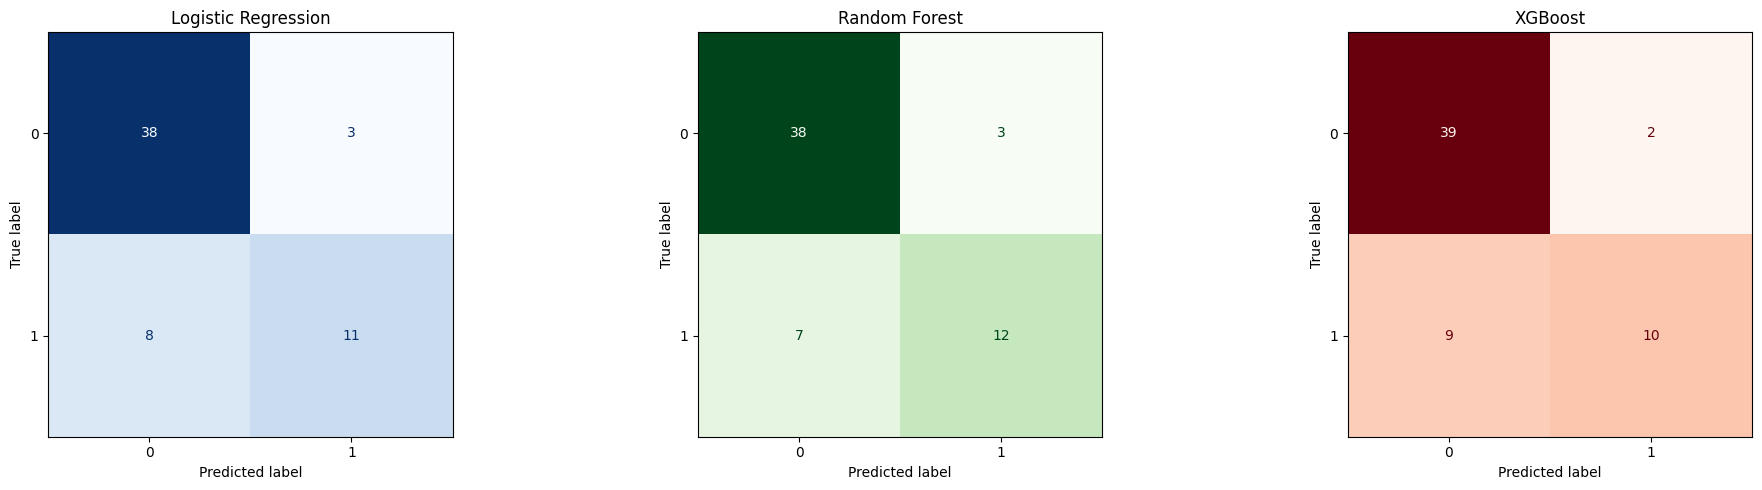

In [8]:
#confusion matrices

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
colors = ['Blues', 'Greens', 'Reds']
models = [logistic_regression_model, random_forest_model, xgboost_model]
titles= ['Logistic Regression', 'Random Forest', 'XGBoost']

for i in range(3):
    confusion_matrix_display(models[i], X_test, y_test, axes[i], colors[i], titles[i])
plt.tight_layout()
plt.show()


The Random Forest model demonstrates the highest Recall at 63% (12/19). As we see from the displayed confusion matrices, Random Forest has the smallest number of False negatives : bottom-left quadrant (Actual: 1, Predicted: 0) and highest number of True Positives : bottom-right quadrant (Actual: 1, Predicted: 1).
While the Accuracy is similar across all models (~82-83%), Random Forest is the most clinically "safe" model for this dataset as it is the most capable of identifying high-risk patients.